# Population density
[Source](https://www.ine.es/jaxiT3/Datos.htm?t=2852#!tabs-tabla)

In [2]:
import matplotlib.pyplot as plt
import os 
import pandas as pd
import numpy as np

In [3]:
import geopandas as gpd

In [9]:
cities = "data/cities_spain.geojson"
map_data = gpd.read_file(cities)
map_data.head()

,NAME_1,NAME_2,CC_2,NAT2018,geometry
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,Andalucía,Cádiz,11,8.11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,Andalucía,Córdoba,14,7.90,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,Andalucía,Granada,18,7.78,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,Andalucía,Huelva,21,7.57,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."


In [4]:
population = "data/population.csv"
population = pd.read_csv(population, delimiter = ';', encoding='latin1')
population['Total'] = population['Total'].apply(lambda x: int(x.replace('.', '')))
population.head()

,Provincias,Sexo,Periodo,Total
0,Total,Total,2019,47026208
1,Total,Total,2018,46722980
2,Total,Total,2017,46572132
3,Total,Total,2016,46557008
4,Total,Total,2015,46624382


In [5]:
print(population['Sexo'].unique())
total = population[population['Sexo'] == 'Total']
men_population = population[population['Sexo'] == 'Hombres']
women_population = population[population['Sexo'] == 'Mujeres']

['Total' 'Hombres' 'Mujeres']


In [6]:
men_population[men_population['Periodo'].isin([2019, 2018, 2017, 2016, 2015])]

,Provincias,Sexo,Periodo,Total
18,Total,Hombres,2019,23042428
19,Total,Hombres,2018,22896602
20,Total,Hombres,2017,22832861
21,Total,Hombres,2016,22843610
22,Total,Hombres,2015,22890383
...,...,...,...,...
2826,52 Melilla,Hombres,2019,43894
2827,52 Melilla,Hombres,2018,43765
2828,52 Melilla,Hombres,2017,43629
2829,52 Melilla,Hombres,2016,43768


In [7]:
last_year = total[total['Periodo'].isin([2019])]
last_year = last_year[last_year['Provincias'] != 'Total']
last_year = last_year.set_index('Provincias')
last_year = pd.DataFrame(last_year['Total'])
last_year = last_year.T

In [10]:
values = []
for city in map_data['NAME_2'].values:
    for index in last_year.columns:
        if index.split()[1] in city:
            break
    values.append(last_year[index].values[0])

In [11]:
map_data['POPULATION2019'] = [(x-min(values))/(max(values)-min(values)) for x in values]

In [12]:
map_data.head()

,NAME_1,NAME_2,CC_2,NAT2018,geometry,POPULATION2019
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",0.095840
1,Andalucía,Cádiz,11,8.11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",0.175412
2,Andalucía,Córdoba,14,7.90,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",0.105900
3,Andalucía,Granada,18,7.78,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",0.125924
4,Andalucía,Huelva,21,7.57,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",0.066199


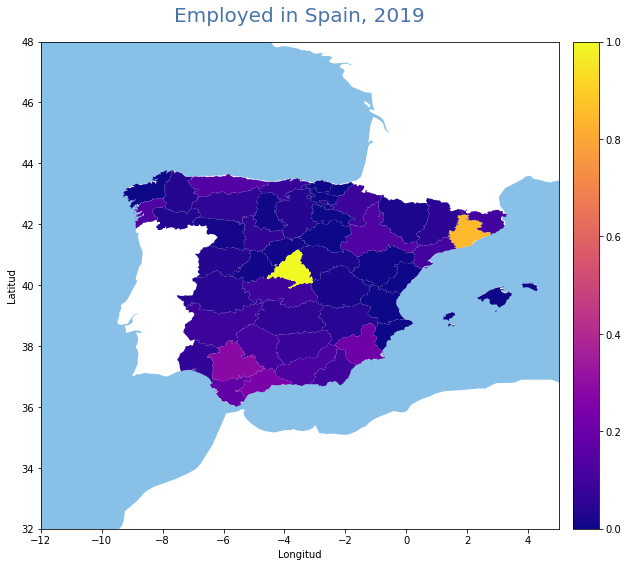

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis([-12, 5, 32, 48]) 
ax.set_title('Employed in Spain, 2019', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

map_data.plot(column='POPULATION2019', cmap='plasma', ax=ax, zorder=5, legend=True, cax=cax)

oceans = "data/ne_50m_ocean.shx"
map_oceans = gpd.read_file(oceans)
map_oceans.plot(ax=ax, color='#89c0e8', zorder=0)